In [12]:
import numpy as np
import sys
import os
print(os.getcwd())


def conv_(img, conv_filter):
    filter_size = conv_filter.shape
    result = []
    padding_size = filter_size[0]//2
    padded_img = np.pad(img, (padding_size, padding_size), 'constant', constant_values=(0,0))
    for r in range(padded_img.shape[0]-int(np.ceil(filter_size[0]/2))):
        row = []
        for c in range(padded_img.shape[1]-int(np.ceil(filter_size[0]/2))):
            
            curr_region = padded_img[0+r:r+filter_size[0]:1,0+c:c+filter_size[0]:1]
            #print("region : ", curr_region)
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result)
            row.append(conv_sum)
        
        result.append(np.array(row))
    final_result = np.array(result)
    return final_result

def convolve(img, conv_filter):
    if len(img.shape) != 2 and len(conv_filter.shape) != 2:
        print("Error: Image and Convolutional Filter should be greyscale or 2D matrix")
        sys.exit()
    if (conv_filter.shape[0] != conv_filter.shape[1]) and (conv_filter.shape[1]%2==0):
        print('Error: Filter must be a square matrix and of odd size.')
        sys.exit()
    feature_map = conv_(img, conv_filter)
    return feature_map

/mnt/Alice/ISI/SEM3/NNA/Assignments/assignment4


# Question 1: Convolutional operation is invariant under translation and shifting

## Answer 

In colvolutional operation, a filter of size smaller (in general cases) is applied on top on the image, now the convolutional operation will give the same output on a specific set of pixels value, hence when the object in the image is shifted or moved to some other position (x,y) in the image the values of the pixels in the area of that object remains same hence the convolutional operation gives the same output hence it is said to be translation and shifting invariant operation.

Given an image I of lets say dimensions N×N and a kernel K of lets say M×M, then the convolution of the image with the kernel at position is given by  Cij=∑p,qIi−p,j−qKp,q. Now lets translate the image lets say k positions down and l positions right. What happens? All the pixels that were at position (i,j) now move to (i+k,h+j). Now lets recompute convolution at this new position. Its Ci′,j′=∑p,qIi+k−p,j+l−qKp,q. Now compare this with the notation above. We get i′=i+k and j′=j+l. Hence the convolution for the image at the position (i,j) also shifts by (k,l) units. 

# Question 2: Convolutional operation is not invariant under rotation and scaling

## Answer 

In colvolutional operation, a filter of size smaller (in general cases) is applied on top on the image, now the convolutional operation will give the same output on a specific set of pixels value.

Now when the object in question is rotated or scaled the actual pixel values of that object change, and convolution operation being applied in the pixel values, the output of the operation differs, hence the convolutional operation is not invariant for rotation and scaling.

In [13]:
# input_img = np.array(
#     [
#         np.array([1,2,3,4]),
#         np.array([6,7,8,9]),
#         np.array([11,12,13,14]),
#         np.array([16,17,18,20]),
#         np.array([21,22,24,25])
#     ]
# )

input_img = np.array(
    [
        np.array([1,0,1,0,1]),
        np.array([1,0,1,0,1]),
        np.array([1,0,1,0,1]),
        np.array([1,0,1,0,1]),
        np.array([1,0,1,0,1])
    ]
)


input_img_five = np.array(
    [
        np.array([1,1,1,1,1]),
        np.array([1,0,0,0,0]),
        np.array([1,1,1,1,1]),
        np.array([0,0,0,0,1]),
        np.array([1,1,1,1,1])
    ]
)

conv_filter_blur = np.array(
    [
        np.array([0,1,0]),
        np.array([1,4,1]),
        np.array([0,1,0])
    ]
)


conv_filter_sharp = np.array(
    [
        np.array([0,-1,0]),
        np.array([-1,8,-1]),
        np.array([0,-1,0])
    ]
)

conv_filter_edges = np.array(
    [
        np.array([0,-1,0]),
        np.array([-1,4,-1]),
        np.array([0,-1,0])
    ]
)



In [14]:
print(convolve(input_img, conv_filter_blur))

[[5 2 5 2 5]
 [6 2 6 2 6]
 [6 2 6 2 6]
 [6 2 6 2 6]
 [5 2 5 2 5]]


In [15]:
print(convolve(input_img, conv_filter_sharp))

[[ 7 -2  7 -2  7]
 [ 6 -2  6 -2  6]
 [ 6 -2  6 -2  6]
 [ 6 -2  6 -2  6]
 [ 7 -2  7 -2  7]]


In [16]:
print(convolve(input_img, conv_filter_edges))

[[ 3 -2  3 -2  3]
 [ 2 -2  2 -2  2]
 [ 2 -2  2 -2  2]
 [ 2 -2  2 -2  2]
 [ 3 -2  3 -2  3]]


In [17]:
print(convolve(input_img_five, conv_filter_edges))

[[ 2  2  2  2  3]
 [ 2 -3 -2 -2 -2]
 [ 2  2  2  2  2]
 [-2 -2 -2 -3  2]
 [ 3  2  2  2  2]]


[0. 1.]


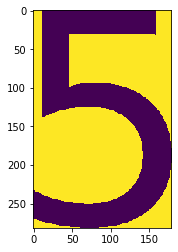

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('/mnt/Alice/ISI/SEM3/NNA/Assignments/assignment4/5.png')     
gray = rgb2gray(img)
gray = np.around(gray)
print(np.unique(gray))
plt.imshow(gray)

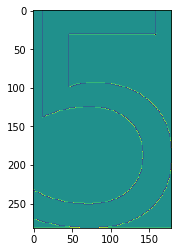

In [19]:
c_e = convolve(gray, conv_filter_edges)
plt.imshow(c_e)

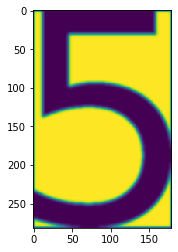

In [20]:
c_b = convolve(gray, conv_filter_blur)
for _ in range(15):
    c_b = convolve(c_b, conv_filter_blur)
plt.imshow(c_b)

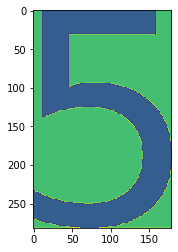

In [21]:
c_s = convolve(gray, conv_filter_sharp)
# for _ in range(1):
#     c_s = convolve(c_s, conv_filter_sharp)
plt.imshow(c_s)